<a href="https://colab.research.google.com/github/LeeSeungwon89/Machine-learning_Theory/blob/master/CHAPTER5%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 회귀 소개**

- 일반 선형 회귀: 예측값과 실젯값의 **RSS(Residual Sum of Squares)**를 최소화할 수 있도록 회귀 계수를 최적화하며 규제를 적용하지 않은 모델입니다.

- **릿지(Ridge)** 회귀: 선형 회귀에 **L2 규제**를 추가한 회귀 모델입니다. L2 규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해 회귀 계수값을 더 작게 만듭니다.

- **라쏘(Lasso)** 회귀: 선형 회귀에 **L1 규제(=피처 선택 기능)**를 추가한 회귀 모델입니다. L1 규제는 예측 형향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않도록 할 수 있습니다.

- **엘라스틱넷(ElasticNet)**: L2, L1 규제를 결합한 회귀 모델입니다. 피처가 많은 데이터 세트에서 적용됩니다. L1 규제로 피처 개수를 줄이면서 L2 규제로 계수 값 크기를 조정합니다.

- **로지스틱 회귀(Logistic Regression)**: 회귀 모델 아닌 분류용 선형 모델입니다. 이진 분류뿐만 아니라 희소 영역의 분류(텍스트 분류 등) 같은 영역에서 좋은 예측 성능을 발휘합니다.

# **2. 단순 선형 회귀를 통한 회귀 이해**

실젯값과 회귀 모델의 차이에 따른 오류 값을 남은 오류 또는 **잔차**라고 부릅니다. 최적의 회귀 모델은 잔차 합이 최소가 되는 모델이며 잔차 합이 최소가 될 수 있는 최적의 회귀 계수를 가진 것을 의미합니다.

잔차는 양수나 음수 모두 될 수 있습니다. 보통 잔차를 계산할 때는 절댓값을 취해서 더하는 방식(**MAE, Mean Absolute Error**), 오류 값의 제곱을 구해서 더하는 방식(**RSS, Residual Sum of Squares**)을 사용합니다. 일반적으로는 RSS 방식을 취합니다. 회귀에서 RSS는 비용(Cost)이고 회귀 계수로 구성되는 RSS를 **비용 함수(손실 함수, Loss Function)**라고 부릅니다. 머신러닝 회귀 알고리즘은 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값인 잔차(오류 값)을 지속해서 감소시키고 더 감소하지 않는 최소 잔차를 구하는 것입니다.

수학 수식은 생략하겠습니다.

# **3. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개**

**경사 하강법**은 비용 함수 RSS를 최소화하는 방법을 직관적으로 제공하는 방식입니다. 점진적이고 반복적으로 계산하면서 회귀 계수 값을 업데이트하고 궁극적으로는 오류 값이 최소가 되는 회귀 계수를 도출하는 방식입니다. 딥러닝의 기반인 신경망에서도 경사 하강법을 통해 학습합니다.

경사 하강법은 반복적으로 비용 함수의 반환 값(예측값과 실젯값의 차이)이 작아지는 방향성을 가지고 W 파라미터(회귀 계수)를 계속 조정합니다. 최초 오류 값을 100으로 가정한다면 두 번째 오류 값은 90, 세 번째 오류 값은 80처럼 지속해서 오류를 감소시키는 방향으로 계속 업데이트합니다. 오류 값이 더 감소할 수 없으면 최소 비용으로 판단하고 최적 파라미터로 반환합니다.

참고로 실전에서는 대부분 대용량 데이터를 다루므로 속도가 빠른 **확률적 경사 하강법(Stochastic Gradient Descent)** 또는 **미니 배치 확률적 경사 하강법(Mini-Batch Stochastic Gradient Descent)**을 사용합니다. 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라 일부 데이터만 이용하여 w가 업데이트되는 값을 계산하므로 일반 경사 하강법보다 속도가 빠릅니다. 

수학적 설명과 수식, 코드 구현은 생략하겠습니다. 자세한 내용은 서적을 참고하시기 바랍니다.



# **4. 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측**

선형 모델 중 규제가 적용되지 않은 `LinearRegression` 클래스를 사용하여 보스턴 주택 가격 예측 회귀를 구현해 보겠습니다.

## **4.1. LinearRegression 클래스 - Ordinary Least Squares**

`LinearRegression` 클래스는 예측값과 실젯값의 RSS를 최소화하여 **OLS(Ordinary Least Squares)** 추정 방식으로 구현한 클래스입니다. OLS 기반의 회귀 계수 계산은 입력 피처의 독립성에 많은 영향을 받습니다. 피처 간 상관관계가 매우 높은 경우 분산이 매우 커져서 오류에 매우 민감해집니다. 이 현상을 **다중 공선성(multi-collinearity)** 문제라고 합니다. 일반적으로 상관관계가 높은 피처가 많은 경우 독립적인 중요한 피처만 남기고 제거하거나 규제를 적용합니다. 또한 매우 많은 피처가 다중 공선성 문제를 가지고 있다면 PCA를 통해 차원 축소를 수행할 수도 있습니다.

## **4.2. 회귀 평가 지표**

회귀 평가 지표는 실젯값과 회귀 예측값의 차이 값을 기반으로 한 지표가 중심입니다. 실젯값과 예측값 차이를 더하면 양수와 음수가 섞여서 오류가 상쇄되므로(+2와 -2를 더하면 0) 정확한 지표가 될 수가 없기 때문에 아래 지표들을 활용합니다. 수식은 생략하겠습니다.

- **MAE(Mean Absolute Error)**: 실젯값과 예측값의 차이를 절댓값으로 변환하여 평균합니다. `metrics` 모듈의 `mean_absolute_error()` 메서드이며, Scoring 함수(`cross_val_score` 메서드와 `GridSearchCV` 클래스)의 `scoring` 파라미터 인자는 `neg_mean_absolute_error`입니다. 

- **MSE(Mean Squared Error)**: 실젯값과 예측값의 차이를 제곱하여 평균합니다. `metrics` 모듈의 `mean_squared_error()` 메서드이며, `scoring` 파라미터 인자는 `neg_mean_squared_error`입니다. 

- **MSLE(Mean Squared Log Error)**: MSE에 로그를 적용합니다. `metrics` 모듈의 `mean_squared_log_error()` 메서드이며, `scoring` 파라미터 인자는 `neg_mean_squared_log_error`입니다. 

- **RMSE(Root Mean Squared Error)**: MSE에 루트를 씌웁니다. MSE는 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있기 때문입니다. 사이킷런이 제공하지 않는 평가 지표이므로 MSE에 루트를 씌워서 계산하는 함수를 정의해야 합니다.

- **RMSLE(Root Mean Squared Log Error)**: RMSL에 로그를 적용합니다. 

- **R$^2$**: 분산 기반으로 예측 성능을 평가합니다. 실젯값의 분산 대비 예측값의 분산 비율을 지표로 합니다. 1에 가까울수록 예측 정확도가 높습니다. `metrics` 모듈의 `r2_score()` 메서드이며, `scoring` 파라미터 인자는 `r2`입니다.

참고로 `scoring` 파라미터 인자의 `neg_`는 Negative(음수)를 가진다는 것을 의미합니다. MAE는 절댓값이므로 음수일 수 없습니다. `neg_mean_absolute_error`를 적용하여 음수값을 변환하는 이유는 Scoring 함수가 `score` 값이 클수록 좋은 평가 결과로 자동적으로 평가하기 때문입니다. 특히 `GridSearchCV`는 가장 좋은 평가 값을 가지는 하이퍼 파라미터로 분류기를 학습까지 자동으로 시킬 수 있습니다. 그러나 실젯값과 예측값의 오류 차이를 기반으로 하는 회귀 평가 지표는 값이 커지면 오히려 나쁜 모델이라는 의미이므로 Scoring 함수에 반영하려면 보정 작업이 필요합니다. 따라서 -1을 원래 평가 지표 값에 곱해서 음수를 만들어 작은 오류 값이 더 큰 숫자로 인식하게 합니다. 즉, `neg_mean_absolute_error`는 $-1 \times$ `mean_absolute_error()`를 의미합니다.


## **4.3. LinearRegression을 이용해 보스턴 주택 가격 회귀 구현**

보스턴 주택 가격을 예측해 보겠습니다.


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF['PRICE'] = boston.target

print('Boston 데이터 세트 크기:', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기: (506, 14)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


피처에 대한 설명을 확인하겠습니다.

In [33]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

결측치를 확인하겠습니다.

In [34]:
bostonDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


결측치는 없습니다. 

각 피처가 회귀 결과에 미치는 영향의 정도를 시각화하여 확인해 보겠습니다.

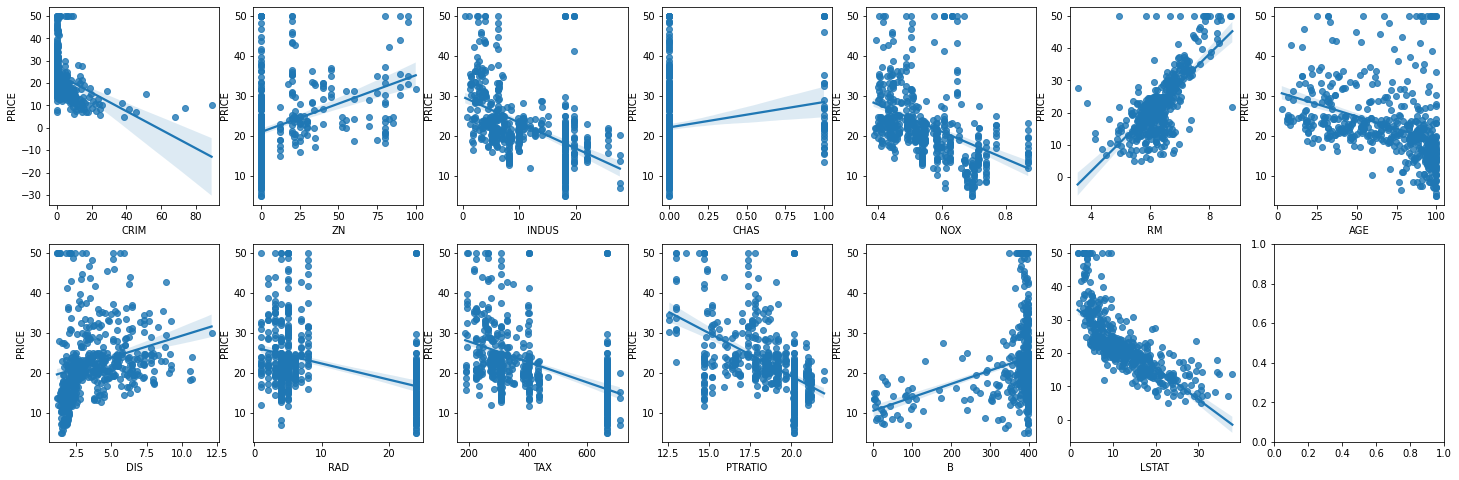

In [35]:
fig, axs = plt.subplots(figsize=(25, 8), ncols=7, nrows=2)
lm_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
               'TAX', 'PTRATIO', 'B', 'LSTAT']
for i, feature in enumerate(lm_features):
    row = int(i /7)
    col = i % 7
    # `regplot()` 메서드를 사용하여 산점도와 선형 회귀 직선을 그립니다.
    sns.regplot(x=feature, y='PRICE', data=bostonDF, ax=axs[row][col])

'RM'과 'LSTAT'가 'PRICE'에 미치는 영향이 가장 커보입니다. 'RM'은 방 개수를 의미합니다. 양 방향의 선형성(Positive Linearity)이 가장 크며 방 개수가 많을수록 가격은 증가합니다. 반면 'LSTAT'는 하위 계층 비율을 의미하며 비율이 높을수록 가격은 하락합니다.

`LinearRegression` 클래스로 회귀 모델을 생성하고 MSE, RMSE, R2 값을 측정하겠습니다.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_target, test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
print('MSE: {:.3f}, RMSE: {:.3f}'.format(mse, rmse))
print('Variance score: {:.3f}'.format(r2_score(y_test, y_preds)))

MSE: 17.297, RMSE: 4.159
Variance score: 0.757


절편(intercept)과 회귀 계수(coefficients)를 확인하겠습니다.

In [37]:
print('절편 값:', lr.intercept_)
print('회귀 계수 값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164755
회귀 계수 값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


피처별 회귀 계수를 내림차순으로 출력해 보겠습니다.

In [38]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

폴드 세트 5개에서 교차 검증으로 MSE와 RMSE를 측정해 보겠습니다. MSE 값이 낮을수록 좋은 회귀 모델입니다. 

In [41]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 folds의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 folds의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 folds의 평균 RNSE: {:.3f}'.format(avg_rmse))

5 folds의 개별 Negative MSE scores: [-12.46 -26.05 -33.07 -80.76 -33.31]
5 folds의 개별 RMSE scores: [3.53 5.1  5.75 8.99 5.77]
5 folds의 평균 RNSE: 5.829


# **5. 다항 회귀와 과(대)적합/과소적합 이해**



---

휴식 중

---



## **5.1. 다항 회귀 이해**

## **5.2. 다항 회귀를 이용한 과소적합 및 과적합 이해**

## **5.3. 편향-분산 트레이드오프(bias-variance trade off)**

# **6. 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷**

## **6.1. 규제 선형 모델의 개요**

## **6.2. 릿지 회귀**

## **6.3. 라쏘 회귀**

## **6.4. 엘라스틱넷 회귀**

## **6.5. 선형 회귀 모델을 위한 데이터 변환**

# **7. 로지스틱 회귀**

# **8. 회귀 트리**

# **9. 회귀 실습 - 자전거 대여 수요 예측**

## **9.1. 데이터 클렌징 및 가공**

## **9.2. 로그 변환, 피처 인코딩과 모델 학습/예측/평가**

# **10. 회귀 실습 - 캐글 주택 가격: 고급 회귀 기법**

## **10.1. 데이터 사전 처리(preprocessing)**

## **10.2. 선형 회귀 모델 학습/예측/평가**

## **10.3. 회귀 트리 모델 학습/예측/평가**

## **10.4. 회귀 모델의 예측 결과 혼합을 통한 최종 예측**

## **10.5. 스태킹 앙상블 모델을 통한 회귀 예측**

# **11. 정리**